# MNIST Hand written Digits Classification by Thiyaneshwaran Nagarajan

### The objective is to classify the images of digits from 0 to 9 using suitable classification Machine Learning Algorithm

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from PIL import Image,ImageChops

# Importing the data, Assigning train and test data

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Shape of training set
#### There are 60000 images of pixel 28 X 28. All the images are grey scale.

In [3]:
X_train.shape

(60000, 28, 28)

### Shape of testing set
#### There are 10000 images of shape 28 x 28

In [4]:
X_test.shape

(10000, 28, 28)

### The shape of target label i.e. y_train. 
#### For the 60000 images in the training set X . Each image belong to one of the integers from 0 to 9 in the y train set. 
#### The image with 0th index contains the integer 5. 

In [5]:
print(y_train.shape)
y_train[0]

(60000,)


5

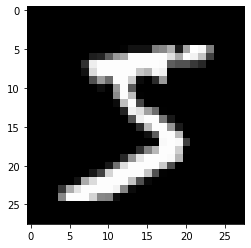

In [6]:
plt.imshow(X_train[0],cmap='gray')

### Shape of the individual image
#### Here the shape of the image does not carry information about batch size and gray scale value.
#### So changing the shape of X_train and X_test.

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train2 = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test2 = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:
X_train2.shape

(60000, 28, 28, 1)

#### Now individual image contain information about the gray scale.

In [10]:
X_train2[0].shape

(28, 28, 1)

## Maximum Value in X_train data

In [11]:
X_train2.max()

255

## Minimum Value in X_train data

In [12]:
X_train2.min()

0

In [13]:
X_train2 = X_train2.astype('float32')

In [14]:
X_test2 = X_test2.astype('float32')

## Scaling the X_train and X_test data 

In [15]:
# scaling
X_train2 = X_train2/255 
X_test2 = X_test2/255

## Checking whether the data in X_train and X_test are balanced or not.

In [16]:
from collections import Counter
Counter(y_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [17]:
Counter(y_test)

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

#### The data counts in all the classes are almost balanced.

# One Hot Encoding of the y_train and y_test

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_categorical_train = to_categorical(y_train,10) #one hot encoder
y_categorical_train.shape

(60000, 10)

In [20]:
y_categorical_test = to_categorical(y_test,10)
y_categorical_test.shape

(10000, 10)

# Modelling the Convolutional Neural Network for Image Classification

In [21]:
# Importing the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [22]:
model = Sequential() # Defining the model

#filter that is used to extract the features from the images

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28,1), activation='relu',))
# POOLING LAYER, 
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28,1)))#, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES
model.add(Flatten())

# First Hidden Layer
# 300 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(300, activation='relu')) # ReLU piecewise linear function 
#that will output the input directly if it is positive, otherwise, it will output zero

# Second Hidden Layer
model.add(Dense(200, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])#Categorical crossentropy between an output tensor and a target tensor, 
#RMSprop is a gradient based optimization technique used in training neural networks,Gradient descent is an optimization algorithm


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 300)               2

# Fitting the CNN model to the X_train and one hot encoded y_categorical_train

In [24]:
model.fit(X_train2,y_categorical_train,verbose=1,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 13ms/step - loss: 0.1200 - accuracy: 0.9630
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0436 - accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0314 - accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0259 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0222 - accuracy: 0.9945


In [25]:
model.save('MNIST_2epochs.h5') # Hierarchial data format

### Loss and Accuracy Score

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(X_test2,y_categorical_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0572 - accuracy: 0.9890


[0.05717545747756958, 0.9890000224113464]

### The accuracy score of the test data is 0.9882

# Predicting with X-test 

In [28]:
from sklearn.metrics import classification_report

prediction = model.predict(X_test2)
prediction

array([[3.0267201e-14, 2.9353853e-09, 2.2240438e-09, ..., 1.0000000e+00,
        4.5190696e-12, 1.4853410e-09],
       [4.2479815e-18, 2.0710850e-16, 1.0000000e+00, ..., 7.9957306e-21,
        9.7072831e-23, 1.1417397e-30],
       [1.2075956e-10, 9.9999952e-01, 1.3927776e-08, ..., 1.7348836e-07,
        3.8471506e-09, 3.0080340e-09],
       ...,
       [1.3656479e-25, 2.5457962e-17, 3.4449346e-21, ..., 1.0798883e-17,
        4.3169254e-15, 4.0143464e-13],
       [6.7334725e-19, 1.7315348e-21, 7.0239898e-26, ..., 2.5878844e-21,
        5.3769607e-11, 1.5689297e-15],
       [3.8938412e-11, 2.8323096e-14, 8.9938831e-15, ..., 5.7372284e-20,
        8.0657789e-13, 9.1921108e-15]], dtype=float32)

## Getting the class of each image in X_test. Here it is in one hot encoded format.

In [29]:
predictions = (model.predict(X_test2) > 0.5).astype(int)  
print(predictions)
predictions[0]

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Now changing from one hot encoded format to 0 to 9 integer format

In [30]:
classes_X=np.argmax(prediction,axis=1)
print(classes_X.shape)
classes_X

(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## Actual classes in the y_test

In [31]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Classification Report

In [32]:
print(classification_report(y_categorical_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predicting for single image. Here for the image in 1st index of the X_test

### Image in 1st index of the X_test

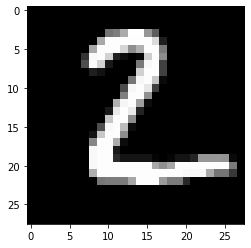

In [33]:
plt.imshow(X_test2[1],cmap='gray') 

### Predicting using the model

In [34]:
new = (model.predict(X_test2[[1]]) > 0.5).astype(int)
print(new)
class_out = np.argmax(new, axis=1)
class_out

[[0 0 1 0 0 0 0 0 0 0]]


array([2], dtype=int64)

#### The class output says the image contains the interger 2

# K Fold Cross Validation

### Choosing the images and its class

In [35]:
X_Kfold = np.concatenate((X_train2, X_test2), axis=0)
y_Kfold= np.concatenate((y_categorical_train, y_categorical_test), axis=0)

### Import Stratified K field and create Kfold object

In [36]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, shuffle=True)

### Create CNN model with 10 folds and save the model after fitting with the image data

In [37]:
Kfold_iter_no = 1
Kfold_accuracy=[]
for train_index, test_index in skfold.split(X_Kfold,y_Kfold.argmax(1)):
    model_Kfold = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
    model_Kfold.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28,1), activation='relu',))
# POOLING LAYER, 
    model_Kfold.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
    model_Kfold.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28,1)))#, activation='relu',))
# POOLING LAYER
    model_Kfold.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES 
    model_Kfold.add(Flatten())

# First Hidden Layer
# 300 NEURONS IN DENSE HIDDEN LAYER 
    model_Kfold.add(Dense(300, activation='relu')) # ReLU piecewise linear function 
#that will output the input directly if it is positive, otherwise, it will output zero

# Second Hidden Layer
    model_Kfold.add(Dense(200, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
    model_Kfold.add(Dense(10, activation='softmax'))


    model_Kfold.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    print("Kfold iteration number: ",Kfold_iter_no,',',"Fitting the training set...")
    model_Kfold.fit(X_Kfold[train_index],y_Kfold[train_index],verbose=1,epochs=7)
    print("\n")
    print ("Kfold iteration number: ",Kfold_iter_no,',',"Evaluating accuracy score for Validation set")
    score=model_Kfold.evaluate(X_Kfold[test_index],y_Kfold[test_index])
    Kfold_accuracy.append(score[1])
    print("\n")
    model_name = f'./models/MNIST-KFOLD-Iter {Kfold_iter_no}.h5'
    model.save(model_name)
    Kfold_iter_no+=1

Kfold iteration number:  1 , Fitting the training set...
Epoch 1/7
1969/1969 [==============================] - 19s 9ms/step - loss: 0.1162 - accuracy: 0.9633
Epoch 2/7
1969/1969 [==============================] - 19s 9ms/step - loss: 0.0417 - accuracy: 0.9870
Epoch 3/7
1969/1969 [==============================] - 17s 9ms/step - loss: 0.0315 - accuracy: 0.9909
Epoch 4/7
1969/1969 [==============================] - 18s 9ms/step - loss: 0.0253 - accuracy: 0.9931
Epoch 5/7
1969/1969 [==============================] - 18s 9ms/step - loss: 0.0203 - accuracy: 0.9946
Epoch 6/7
1969/1969 [==============================] - 19s 10ms/step - loss: 0.0185 - accuracy: 0.9955
Epoch 7/7
1969/1969 [==============================] - 16s 8ms/step - loss: 0.0153 - accuracy: 0.9961


Kfold iteration number:  1 , Evaluating accuracy score for Validation set
219/219 [==============================] - 1s 4ms/step - loss: 0.0581 - accuracy: 0.9891


Kfold iteration number:  2 , Fitting the training set...
Epoc

### Accuracy scores of the validation folds

In [38]:
print("Accuracies of the 10 validation folds \n",Kfold_accuracy)
Kfold_avg_accuracy=np.array(Kfold_accuracy).mean()
print("\n")
print ("Avearge accuracy of the 10 validation folds: ", Kfold_avg_accuracy)

Accuracies of the 10 validation folds 
 [0.9891428351402283, 0.9890000224113464, 0.9882857203483582, 0.9888571500778198, 0.9915714263916016, 0.9900000095367432, 0.9885714054107666, 0.9894285798072815, 0.9891428351402283, 0.9892857074737549]


Avearge accuracy of the 10 validation folds:  0.9893285691738128


### Creating a list of model hdf file names and loading the model

In [40]:
import os
model_hdf_files = os.listdir('./models/') # Creates a list with the model names
MNIST_Kfold_models=[] # Loading the object into this list
for model_file in model_hdf_files:
    MNIST_Kfold_models.append(tf.keras.models.load_model(f'./models/{model_file}', compile=True))

In [41]:
model_hdf_files

['MNIST-KFOLD-Iter 1.h5',
 'MNIST-KFOLD-Iter 10.h5',
 'MNIST-KFOLD-Iter 2.h5',
 'MNIST-KFOLD-Iter 3.h5',
 'MNIST-KFOLD-Iter 4.h5',
 'MNIST-KFOLD-Iter 5.h5',
 'MNIST-KFOLD-Iter 6.h5',
 'MNIST-KFOLD-Iter 7.h5',
 'MNIST-KFOLD-Iter 8.h5',
 'MNIST-KFOLD-Iter 9.h5']

### List of 10 fold CNN models

In [42]:
MNIST_Kfold_models

### Preciding using the above models

In [43]:
predictions_Kfold_models=[]
for Kf_model in MNIST_Kfold_models:
    result=(Kf_model.predict(X_Kfold[test_index]) > 0.5).astype(int)
    class_result=np.argmax(result, axis=1)
    predictions_Kfold_models.append(class_result)

### Predictions of the 10 fold CNN models

In [44]:
predictions_Kfold_models

[array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64),
 array([1, 3, 6, ..., 6, 0, 1], dtype=int64)]

### Creating a Dataframe of the results

In [45]:
result_data=pd.DataFrame(predictions_Kfold_models)
result_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
1,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
2,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
3,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
4,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
5,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
6,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
7,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
8,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1
9,1,3,6,2,4,8,4,0,1,4,...,8,3,1,0,0,8,4,6,0,1


### Final Result from the ensemble of 10 fold CNN Models

In [46]:
final_result = result_data.mode().values
print(final_result[0])

[1 3 6 ... 6 0 1]


### Classification Report

In [54]:
model_number=1
for n_predictions in predictions_Kfold_models:
    print(f'Classification Report of KFOLD CNN model {model_number} \n')
    print(classification_report(n_predictions,np.argmax(y_Kfold[test_index], axis=1)))
    model_number+=1

Classification Report of KFOLD CNN model 1 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       691
           1       1.00      1.00      1.00       788
           2       1.00      0.99      1.00       703
           3       1.00      0.99      1.00       719
           4       1.00      1.00      1.00       684
           5       1.00      0.99      0.99       632
           6       0.99      1.00      1.00       686
           7       0.99      1.00      1.00       724
           8       0.99      1.00      1.00       680
           9       0.99      1.00      1.00       693

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Classification Report of KFOLD CNN model 2 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       691
           1       1.00      1.00      1.0